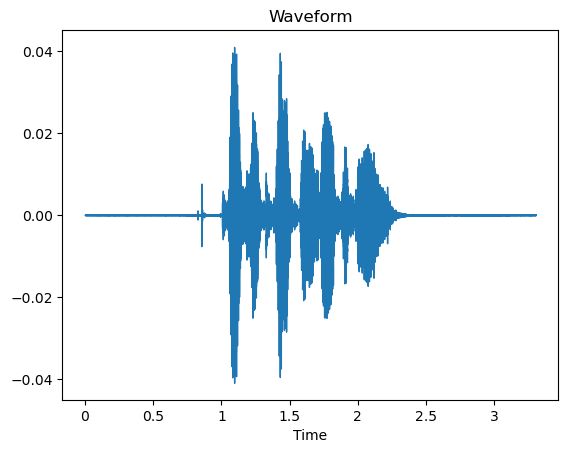

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
file_path = "C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(file_path)

# Display the waveform
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()

In [5]:
from IPython.display import Audio

org=Audio(data=y, rate=sr)

In [6]:
import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

Original Audio:


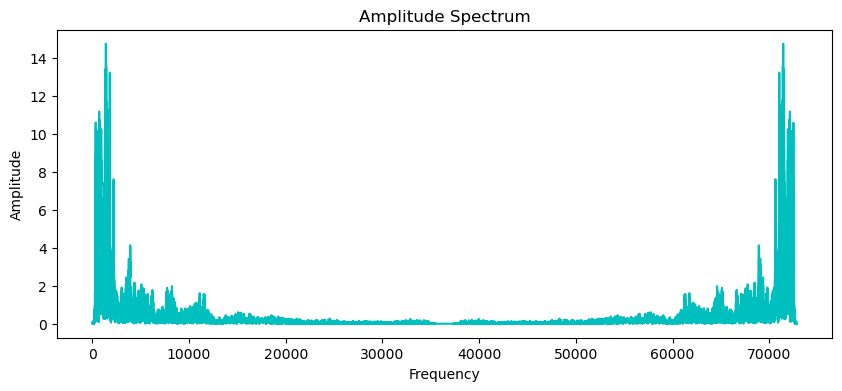

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fft_result = np.fft.fft(y)
amp_spectrum = np.abs(fft_result)

plt.figure(figsize=(10, 4))
plt.plot(amp_spectrum,"c")
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


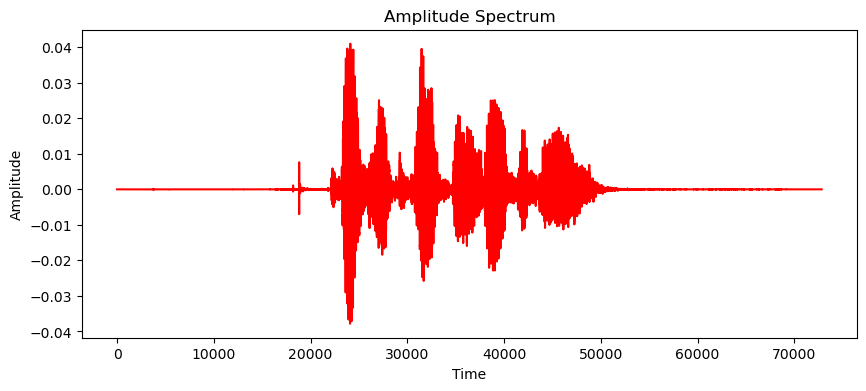

In [8]:
ifft_result = np.fft.ifft(fft_result)
plt.figure(figsize=(10, 4))
plt.plot(ifft_result,"r")

plt.title('Amplitude Spectrum')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Text(0.5, 1.0, 'Original Signal')

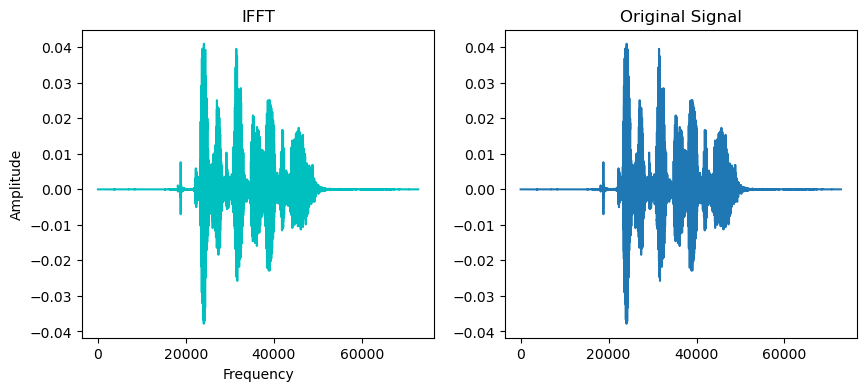

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(ifft_result,"c")
plt.title('IFFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.plot(y)
plt.title('Original Signal')

In [10]:
start=20000
end=30000
word_audio=y[start:end]

In [11]:
y.shape

(72838,)

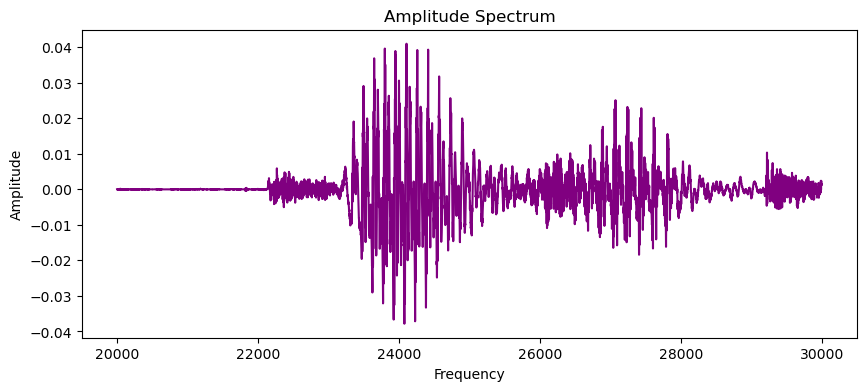

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(range(start,end),word_audio,"purple")
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [13]:
audio_stft=np.abs(librosa.stft(y))

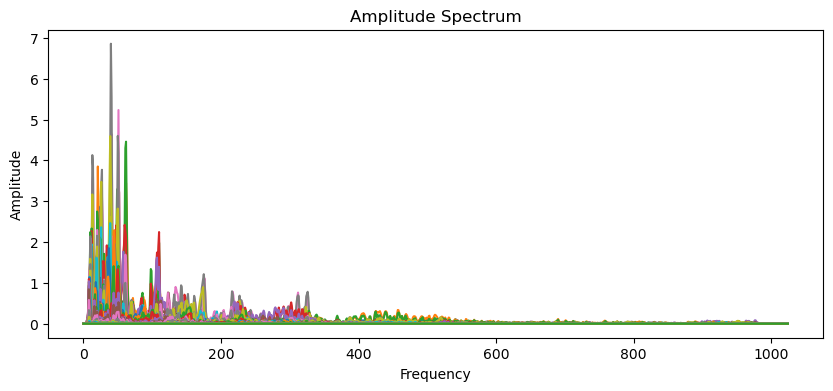

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(audio_stft)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

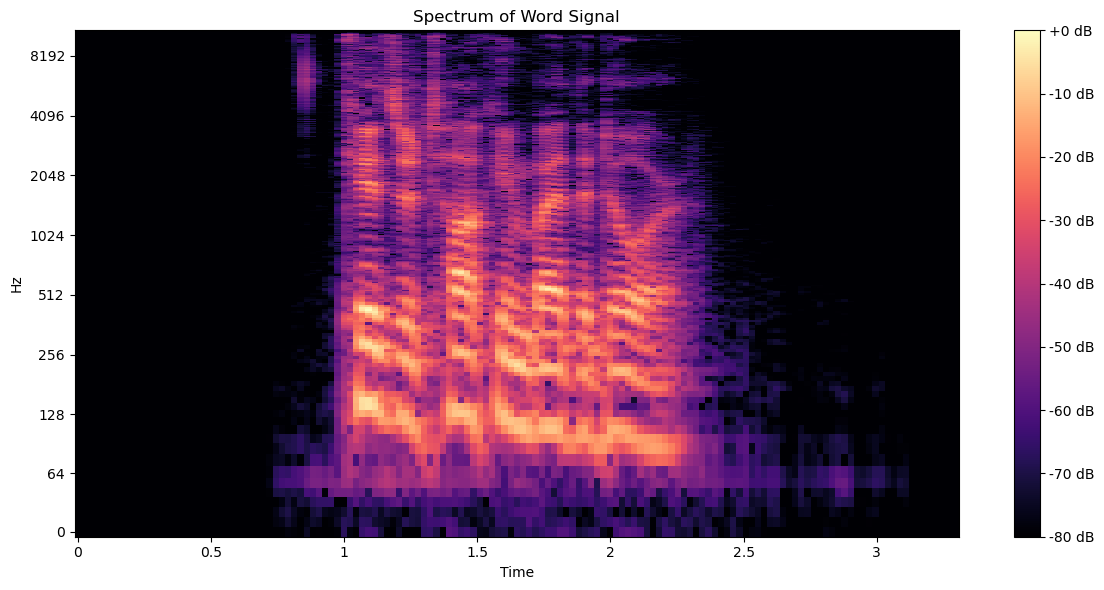

In [15]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(audio_stft, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrum of Word Signal')
plt.tight_layout()
plt.show()

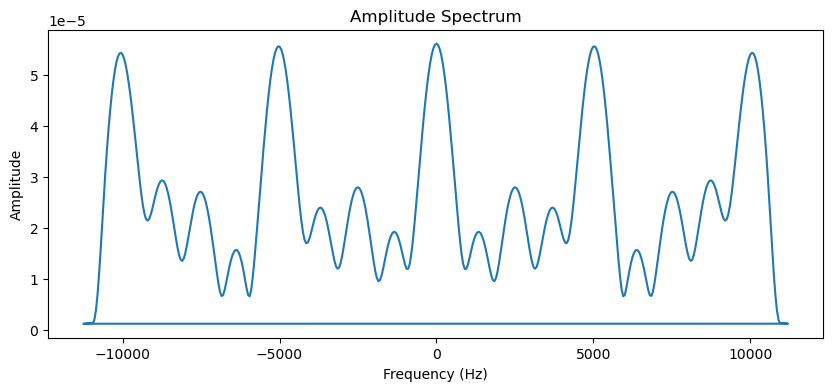

In [16]:
sample_rate = 22500  # 22.5 KHz
window_size = int(0.02 * sample_rate)  

windowed_signal = y[:window_size]
fft_result = np.fft.fft(windowed_signal)
amplitude_spectrum = np.abs(fft_result)
1
frequencies = np.fft.fftfreq(window_size, 1/sample_rate)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitude_spectrum)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

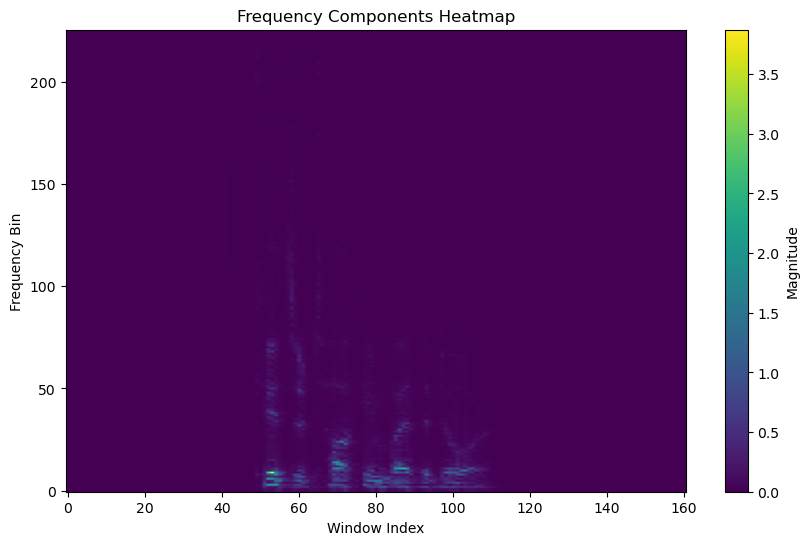

In [27]:
import numpy as np
import matplotlib.pyplot as plt

window_length = 0.02

window_size = int(window_length * sample_rate)
num_windows = len(y) // window_size

freq_matrix = np.zeros((window_size // 2 + 1, num_windows))

for i in range(num_windows):
    window = y[i * window_size: (i + 1) * window_size]
    freq_components = np.fft.rfft(window)
    freq_matrix[:, i] = np.abs(freq_components)

# Display the matrix using a heatmap plot
plt.figure(figsize=(10, 6))
plt.imshow(freq_matrix, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.title('Frequency Components Heatmap')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()


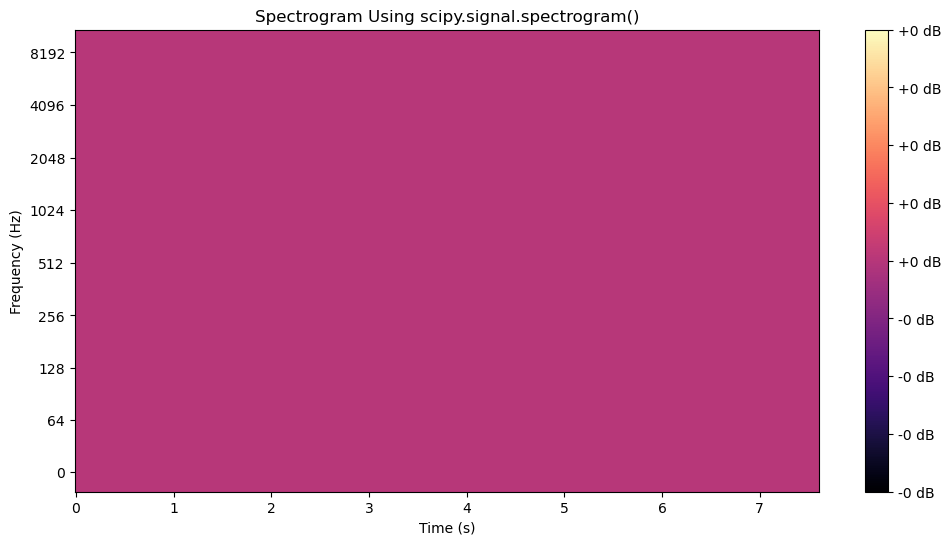

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

window_length = 0.02
window_size = int(window_length * sr)
frequencies, times, spectrogram_matrix = spectrogram(y, fs=sample_rate, nperseg=window_size, noverlap=window_size//2)
plt.figure(figsize=(12, 6))

librosa.display.specshow(librosa.amplitude_to_db(spectrogram_matrix, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Using scipy.signal.spectrogram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()
